<a href="https://colab.research.google.com/github/muhamadfadil316/MACHINE-LEARNING/blob/main/PraktikumMandiri12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum Mandiri Data Cancer Menggunakan PCA

In [1]:
# Import library dasar
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # untuk 3D plot
# Agar plot tampil rapi
plt.rcParams['figure.figsize'] = (8, 6)

In [2]:
import pandas as pd

df_cancer = pd.read_csv('/content/cancer.csv')

df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df_cancer.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [8]:
# menghapus kolom
df_cancer.drop('Unnamed: 32', axis=1, inplace=True)

In [9]:
df_cancer.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [10]:
df_cancer.duplicated().sum()

np.int64(0)

In [13]:
print("Nama kelas:", df_cancer['diagnosis'].unique())
df_cancer['diagnosis'].value_counts()

Nama kelas: ['M' 'B']


,count
diagnosis,
B,357
M,212


In [14]:
# Pisahkan fitur dan label
X = df_cancer.drop(['id', 'diagnosis'], axis=1).values   # semua kolom fitur
y = df_cancer['diagnosis'].map({'M': 1, 'B': 0}).values  # label: M=1, B=0

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (569, 30)
Shape y: (569,)


In [15]:
# Train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)

Shape X_train: (455, 30)
Shape X_test : (114, 30)


In [16]:
# Standarisasi (mean=0, std=1)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # fit + transform pada data train
X_test_scaled = scaler.transform(X_test)  # hanya transform pada data test

X_train_scaled[:5]

array([[ 5.18558727e-01,  8.91825791e-01,  4.24631702e-01,
         3.83925436e-01, -9.74743706e-01, -6.89771505e-01,
        -6.88586446e-01, -3.98175254e-01, -1.03915470e+00,
        -8.25056321e-01, -1.09317755e-01, -5.59755400e-02,
        -2.10096206e-01, -1.59132582e-02, -1.00518399e+00,
        -9.11941990e-01, -6.62815884e-01, -6.52561081e-01,
        -7.01889114e-01, -2.75393571e-01,  5.79797697e-01,
         1.31324246e+00,  4.66908134e-01,  4.45982711e-01,
        -5.96154777e-01, -6.34722227e-01, -6.10227299e-01,
        -2.35743918e-01,  5.45663235e-02,  2.18367276e-02],
       [-5.16364088e-01, -1.63971029e+00, -5.41348716e-01,
        -5.42961327e-01,  4.76219058e-01, -6.31833818e-01,
        -6.04281166e-01, -3.03074908e-01,  5.21543093e-01,
        -4.54522896e-01, -6.04377961e-01, -1.00104604e+00,
        -5.85429002e-01, -4.93453793e-01,  4.03212009e-01,
        -7.68173276e-01, -4.79187222e-01,  1.14508478e-01,
        -1.42950761e-01, -5.77397732e-01, -5.82458953e-

In [18]:
# Model SVM tanpa PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Model
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)

# Prediksi
y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

# Akurasi
acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Akurasi SVM tanpa PCA:", acc_no_pca)

# Nama kelas untuk laporan
class_names = ['Benign', 'Malignant']   # 0 = B, 1 = M

print("\nClassification Report (tanpa PCA):")
print(classification_report(y_test, y_pred_no_pca, target_names=class_names))

Akurasi SVM tanpa PCA: 0.9736842105263158

Classification Report (tanpa PCA):
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [19]:
# PCA dengan 3 komponen utama
from sklearn.decomposition import PCA

# Anda perlu memastikan bahwa X_train_scaled dan X_test_scaled sudah terdefinisi
# (dari langkah Standardisasi sebelumnya).

pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Shape X_train_pca:", X_train_pca.shape) # (n_train, 3)
print("Shape X_test_pca :", X_test_pca.shape) # (n_test, 3)

Shape X_train_pca: (455, 3)
Shape X_test_pca : (114, 3)


In [20]:
# Variansi yang dijelaskan oleh tiap komponen
explained_var = pca.explained_variance_ratio_

print("Explained Variance Ratio tiap komponen:", explained_var)
print("Total variansi yang dijelaskan 3 komponen pertama:", explained_var.sum())

Explained Variance Ratio tiap komponen: [0.44593522 0.18545255 0.09584641]
Total variansi yang dijelaskan 3 komponen pertama: 0.7272341886241546


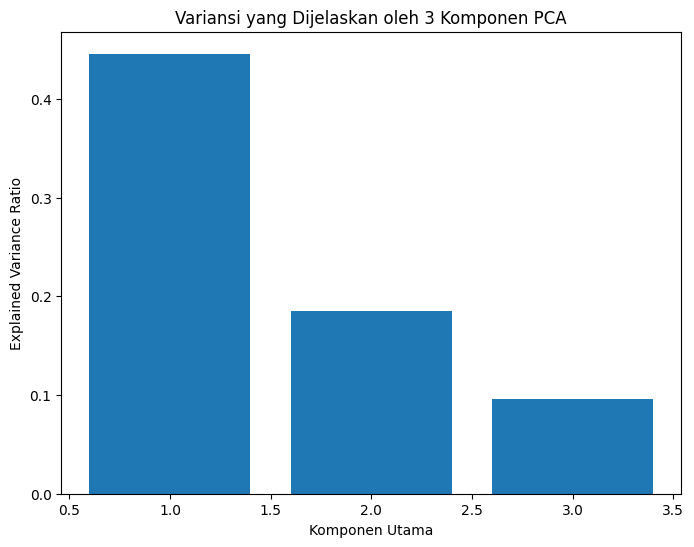

In [21]:
import matplotlib.pyplot as plt

# Pastikan explained_var sudah terdefinisi dari langkah sebelumnya:
# explained_var = pca.explained_variance_ratio_

plt.bar([1, 2, 3], explained_var)
plt.xlabel('Komponen Utama')
plt.ylabel('Explained Variance Ratio')
plt.title('Variansi yang Dijelaskan oleh 3 Komponen PCA')
plt.show()

In [22]:
# Model SVM dengan PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Anda perlu memastikan bahwa X_train_pca, X_test_pca, dan y_train sudah terdefinisi
# (dari langkah PCA sebelumnya).

svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

# Prediksi dan evaluasi
y_pred_pca = svm_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Akurasi SVM dengan PCA (3 komponen):", acc_pca)

print("\nClassification Report (dengan PCA):")
print(classification_report(y_test, y_pred_pca, target_names=class_names))

Akurasi SVM dengan PCA (3 komponen): 0.956140350877193

Classification Report (dengan PCA):
              precision    recall  f1-score   support

      Benign       0.94      1.00      0.97        72
   Malignant       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



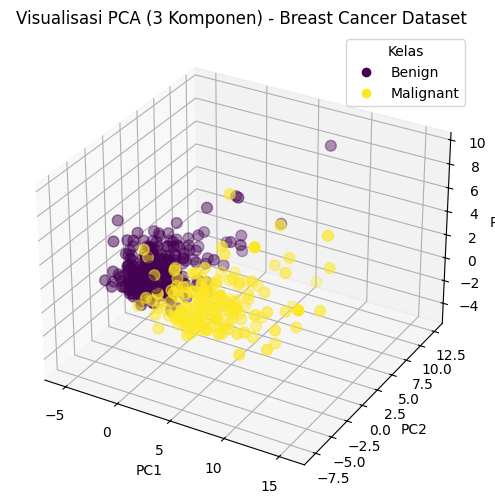

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # jika diperlukan

# Membuat figure dan axis 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot PCA
scatter = ax.scatter(
    X_train_pca[:, 0],  # PC1
    X_train_pca[:, 1],  # PC2
    X_train_pca[:, 2],  # PC3
    c=y_train,          # 0 = Benign, 1 = Malignant
    s=60
)

ax.set_title('Visualisasi PCA (3 Komponen) - Breast Cancer Dataset')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Legend untuk kelas (Benign, Malignant)
class_labels = ['Benign', 'Malignant']
handles, _ = scatter.legend_elements()
ax.legend(handles, class_labels, title="Kelas")

plt.show()

In [24]:
# Membandingkan hasil model tanpa dan dengan PCA
import pandas as pd # Tambahkan import pandas jika belum dilakukan di awal

comparison = pd.DataFrame({
    'Model': ['SVM Tanpa PCA', 'SVM Dengan PCA (3 Komponen)'],
    'Jumlah Fitur': [X_train_scaled.shape[1], X_train_pca.shape[1]],
    'Akurasi': [acc_no_pca, acc_pca],
    'Variansi Total PCA': ['None', explained_var.sum()]
})

comparison

,Model,Jumlah Fitur,Akurasi,Variansi Total PCA
0,SVM Tanpa PCA,30,0.973684,None
1,SVM Dengan PCA (3 Komponen),3,0.956140,0.727234


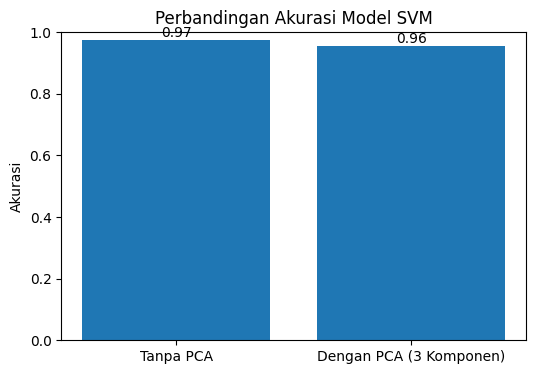

In [25]:
import matplotlib.pyplot as plt

# Pastikan acc_no_pca dan acc_pca sudah terdefinisi dari langkah-langkah sebelumnya.

plt.figure(figsize=(6,4))
plt.bar(['Tanpa PCA', 'Dengan PCA (3 Komponen)'], [acc_no_pca, acc_pca])
plt.title('Perbandingan Akurasi Model SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1)

# Menambahkan nilai akurasi di atas bar
for i, v in enumerate([acc_no_pca, acc_pca]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.show()